# 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Analysis

## 01. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing data
path = r'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = 0)

## 02. Data Cleaning

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_binary', 'smoker_binary', 'Cost category'],
      dtype='object')

In [5]:
# rename columns to same format
df.rename(columns = {'Cost category' : 'cost_category'}, inplace = True)

In [6]:
df.head(10)

age     sex     bmi  children smoker     region      charges  sex_binary  \
0   19  female  27.900         0    yes       West  16884.92400           0   
1   18    male  33.770         1     no      South   1725.55230           1   
2   28    male  33.000         3     no      South   4449.46200           1   
3   33    male  22.705         0     no    Midwest  21984.47061           1   
4   32    male  28.880         0     no    Midwest   3866.85520           1   
5   31  female  25.740         0     no      South   3756.62160           0   
6   46  female  33.440         1     no      South   8240.58960           0   
7   37  female  27.740         3     no    Midwest   7281.50560           0   
8   37    male  29.830         2     no  Northeast   6406.41070           1   
9   60  female  25.840         0     no    Midwest  28923.13692           0   

   smoker_binary cost_category  
0              1   Middle Cost  
1              0      Low Cost  
2              0      Low Cost  
3              0   Middle Cost  
4              0      Low Cost  
5              0      Low Cost  
6              0      Low Cost  
7              0      Low Cost  
8              0      Low Cost  
9              0   Middle Cost

In [7]:
df.shape

(1337, 10)

##### Extreme values checks

In [9]:
sns.distplot(df['charges'], bins=20) # Shows extreme values

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_25518/3949583242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=20) # Shows extreme values


<Axes: xlabel='charges', ylabel='Density'>

In [10]:
df['charges'].mean()

13279.121486655948

In [11]:
df['charges'].median()

9386.1613

In [12]:
df['charges'].max()

63770.42801

### 03. Data prep for regression analysis 

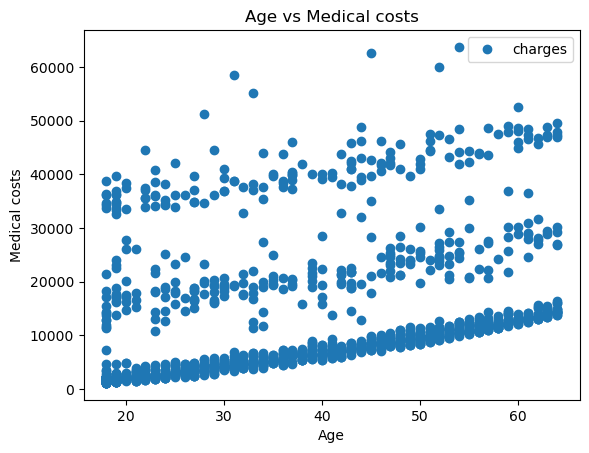

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Medical costs')  
plt.xlabel('Age')  
plt.ylabel('Medical costs')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [24]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [25]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [28]:
# Create a regression object.

regression = LinearRegression()  

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

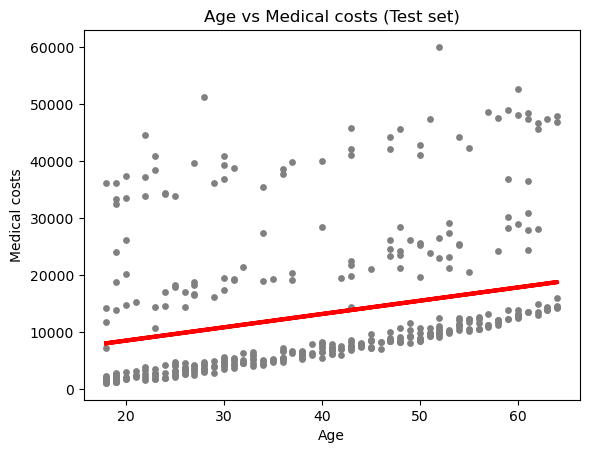

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Medical costs (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Medical costs')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367427


In [34]:
y_predicted

array([[ 8086.24297948],
       [14843.9358021 ],
       [15309.98358297],
       [ 8319.26686991],
       [15776.03136384],
       [ 9950.43410296],
       [ 8086.24297948],
       [ 8319.26686991],
       [ 8319.26686991],
       [17407.19859688],
       [15076.95969253],
       [ 9950.43410296],
       [18572.31804906],
       [14144.86413079],
       [12280.67300731],
       [ 9251.36243165],
       [12280.67300731],
       [ 9950.43410296],
       [12746.72078818],
       [18805.34193949],
       [ 8086.24297948],
       [17873.24637775],
       [ 8319.26686991],
       [ 9018.33854122],
       [ 9018.33854122],
       [11348.57744557],
       [10416.48188383],
       [15309.98358297],
       [11115.55355513],
       [ 8552.29076035],
       [13212.76856905],
       [15776.03136384],
       [16941.15081601],
       [16708.12692558],
       [ 9484.38632209],
       [18106.27026819],
       [14610.91191166],
       [10416.48188383],
       [14843.9358021 ],
       [ 8552.29076035],


In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0    1633.96180   8086.242979
1    8547.69130  14843.935802
2    9290.13950  15309.983583
3   32548.34050   8319.266870
4    9644.25250  15776.031364
5    2680.94930   9950.434103
6    2198.18985   8086.242979
7    1241.56500   8319.266870
8    2710.82855   8319.266870
9   12235.83920  17407.198597
10   8280.62270  15076.959693
11  17043.34140   9950.434103
12  13974.45555  18572.318049
13   8219.20390  14144.864131
14   5472.44900  12280.673007
15   2438.05520   9251.362432
16   5267.81815  12280.673007
17   3490.54910   9950.434103
18   6640.54485  12746.720788
19  14692.66935  18805.341939
20   1622.18850   8086.242979
21  13224.69300  17873.246378
22   1256.29900   8319.266870
23   2643.26850   9018.338541
24   1674.63230   9018.338541
25   4667.60765  11348.577446
26   3732.62510  10416.481884
27  11552.90400  15309.983583
28   3756.62160  11115.553555
29  37465.34375   8552.290760

##### Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


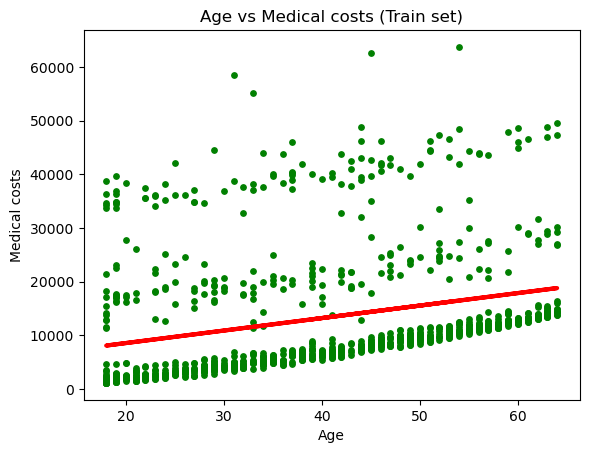

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Medical costs (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Medical costs')
plot_test.show()

##### Analysis

The model outcome for both the test and train set were very similar. They both had a direct correlation linking age and medical costs. There was a slight slope showing increasing age leads to higher medical costs.